# Guia rápido de plotagem - `matplotlib`

- Plotagem genérica em modo explícito (interface "OO-like")

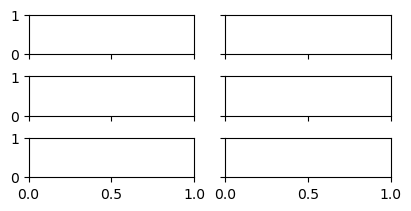

In [2]:
import matplotlib.pyplot as plt

# fig é objeto matplotlib.Figure
# ax é objeto matplotlib.Axes
fig, ax = plt.subplots(nrows=3,
                       ncols=2,
                       sharex=True,
                       sharey=True,
                       num=1,
                       clear=True,
                       constrained_layout=True, # controle de interpadding
                       figsize=(4,2) 
                       ) 

- Controle da escala de eixos

(-2.0, 4.0)

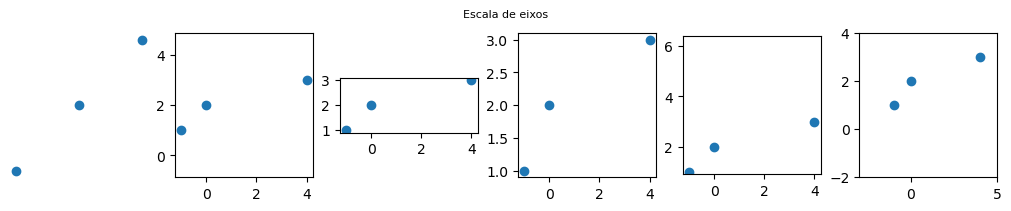

In [38]:
fig, ax = plt.subplots(1,6,figsize=(10,2),constrained_layout=True)
fig.suptitle('Escala de eixos',fontsize=8)

xmin, xmax, ymin, ymax = ax[0].axis('off')
ax[0].plot([-1,0,1],[1,2,3],'o')

# mesma escala; círculos ficam circulares alterando limites
ax[1].plot([-1,0,4],[1,2,3],'o')
ax[1].axis('equal')

# mesma escala; círculos ficam circulares alterando dimensões da Figure
ax[2].plot([-1,0,4],[1,2,3],'o')
ax[2].axis('scaled')

# limites grandes o bastante para acomodação aos dados
ax[3].plot([-1,0,4],[1,2,3],'o')
ax[3].axis('tight')

# xmax - xmin = ymax - ymin
ax[4].plot([-1,0,4],[1,2,3],'o')
ax[4].axis('square')

# limites customizados
ax[5].plot([-1,0,4],[1,2,3],'o')
ax[5].axis([-3,5,-2,4]) # 1a. forma
ax[5].set_xlim(-3,5); ax[5].set_ylim(-2,4); # 2a. forma




- Visibilidade de eixos

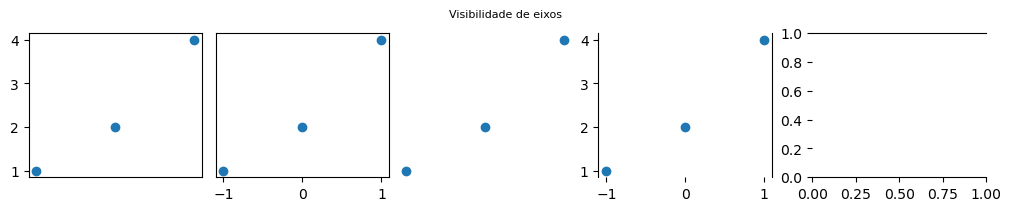

In [8]:
fig, ax = plt.subplots(1,5,figsize=(10,2),constrained_layout=True)
fig.suptitle('Visibilidade de eixos',fontsize=8)

ax[0].get_xaxis().set_visible(False)
ax[0].plot([-1,0,1],[1,2,4],'o')

ax[1].get_yaxis().set_visible(False)
ax[1].plot([-1,0,1],[1,2,4],'o')

ax[2].set_axis_off() # axis('off')
ax[2].plot([-1,0,1],[1,2,4],'o')

ax[3].set_visible(True) # visibilidade do Artist
ax[3].plot([-1,0,1],[1,2,4],'o')
ax[3].spines['top'].set_visible(False)
ax[3].spines.bottom.set_visible(False)

ax[4].spines['left'].set_visible(False)
ax[4].spines.right.set_visible(False)

## Mosaicos

- Layouts com `GridSpec`

    - `gs = fig.add_gridspec(m,n)`: cria mosaico
    - `fig.add_subplot(gs[m:,n:])`: posiciona plot no mosaico

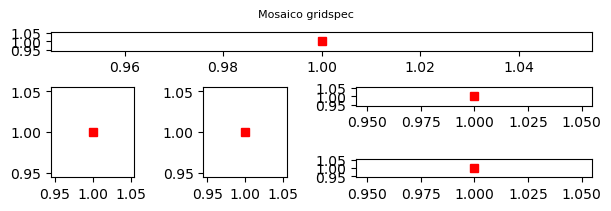

In [71]:
fig = plt.figure(figsize=(6,2),constrained_layout=True) # figura de background
fig.suptitle('Mosaico gridspec',fontsize=8)
gs = fig.add_gridspec(3,4) 
fig_ax1 = fig.add_subplot(gs[0,:])
fig_ax2 = fig.add_subplot(gs[1:,0])
fig_ax3 = fig.add_subplot(gs[1:,1])
fig_ax4 = fig.add_subplot(gs[1,2:])
fig_ax5 = fig.add_subplot(gs[2,2:])

for eixo in fig.axes:
    eixo.plot(1,1,'rs')

- `gridspec` com larguras e alturas variáveis

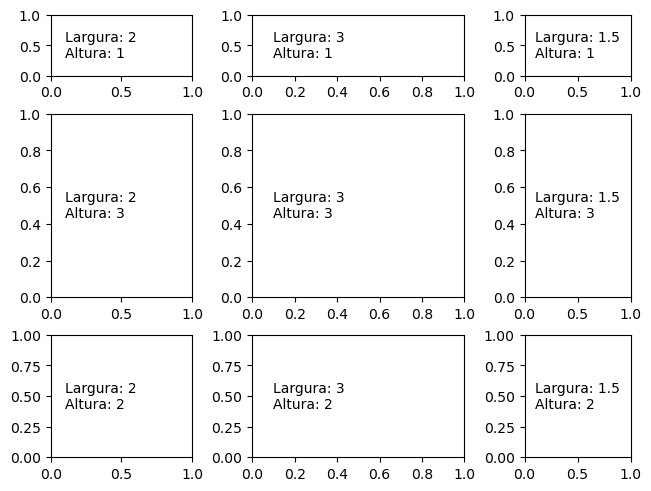

In [78]:
fig = plt.figure(constrained_layout=True)
w = [2, 3, 1.5]
h = [1, 3, 2]
gs = fig.add_gridspec(ncols=3, 
                      nrows=3, 
                      width_ratios=w,
                      height_ratios=h)


for row in range(3):
    for col in range(3):
        ax = fig.add_subplot(gs[row, col])
        label = f'Largura: {w[col]}\nAltura: {h[row]}'
        ax.annotate(label, (0.1, 0.5), xycoords='axes fraction', va='center')

- `subgridspec`

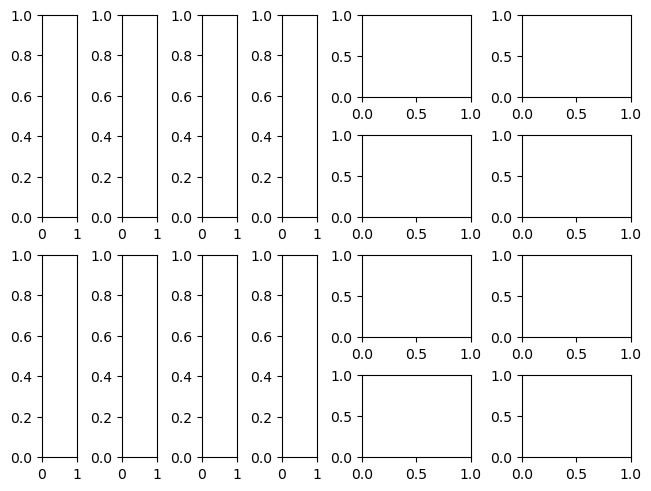

In [86]:
f = plt.figure(constrained_layout=True)

# primeiro nível
gs0 = f.add_gridspec(1, 2) 

# segundo nível
gs00 = gs0[0].subgridspec(2, 4)
gs01 = gs0[1].subgridspec(4, 2)

for a in range(2):
    for b in range(4):
        f.add_subplot(gs00[a, b])
        f.add_subplot(gs01[b, a])

- Eixos embutidos

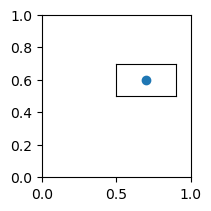

In [99]:
fig, ax = plt.subplots(figsize=(2,2),constrained_layout=True)
x0, y0 = 0.5,0.5
width, height = 0.4,0.2
ax2 = ax.inset_axes(bounds=[x0,y0,width,height])
ax2.plot(0.5,0.5,'o')
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)



- Eixos apensados

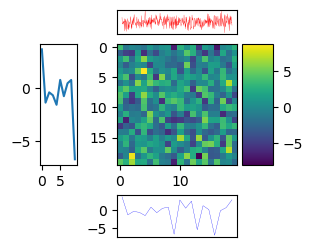

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# dado
data = np.random.normal(0,3,size=(20,20))

# figura
fig,ax = plt.subplots(figsize=(3,3))
im = ax.imshow(data)

# divisor
divider = make_axes_locatable(ax)

# eixos
ax_left = divider.append_axes("left", size="30%", pad=0.4) 
ax_left.plot(data.flatten()[:10])

ax_top = divider.append_axes("top", size="20%", pad=0.1) 
ax_top.plot(data.flatten(),c='r',lw=0.2)
ax_top.axis('tight')
ax_top.get_xaxis().set_visible(False); ax_top.get_yaxis().set_visible(False)

ax_right = divider.append_axes("right", size="25%", pad=0.05) 
plt.colorbar(im,cax=ax_right)

ax_bot = divider.append_axes("bottom", size="35%", pad=0.3) 
ax_bot.plot(data.flatten()[:20],c='b',lw=0.2)
ax_bot.axis('tight')
ax_bot.get_xaxis().set_visible(False); ax_top.get_yaxis().set_visible(False)


## Estilo de linha e _cap_

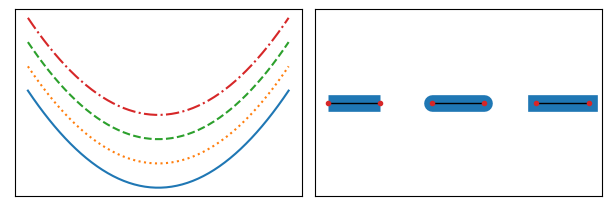

In [178]:
fig, ax = plt.subplots(1,2,figsize=(6,2),constrained_layout=True)
x = np.linspace(-2,2)

# estilo de linha
linestyles = ['-',':','--','-.']

gap = 1
for lsi in linestyles:
    ax[0].plot(x,x**2 + gap,ls=lsi)
    gap += 1

ax[0].xaxis.set_visible(False)
ax[0].yaxis.set_visible(False)

# estilo de cap
for x, style in enumerate(['butt', 'round', 'projecting']):
    xx = [x, x+0.5]
    yy = [0, 0]
    ax[1].plot(xx, yy, lw=12, color='tab:blue', solid_capstyle=style)
    ax[1].plot(xx, yy, lw=1, color='black')
    ax[1].plot(xx, yy, 'o', color='tab:red', markersize=3)

ax[1].xaxis.set_visible(False)
ax[1].yaxis.set_visible(False)

## Marcadores

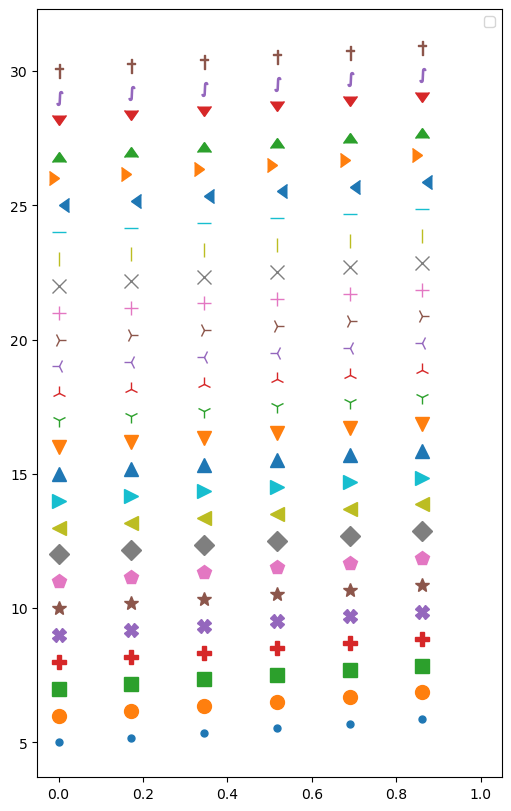

In [6]:
markers = ['.','o','s','P','X','*','p','D','<','>','^','v', \
             '1','2','3','4','+','x','|','_',4,5,6,7, \
         '$\\int$','$\\dagger$' ]

fig, ax = plt.subplots(figsize=(5,8),constrained_layout=True)

dom = np.linspace(0,1,30)
gap = 5
for i in range(len(markers)):
    ax.plot(dom,dom + gap,ls='',lw=0.5,ms=10,marker=markers[i],markevery=5)
    gap += 1

ax.axis('tight');